# 

In [1]:
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point

df = pd.read_csv("gold_24hrs.csv")

df['datetime'] = pd.to_datetime(df['report_date'] + ' ' + df['report_time'])
df = df.drop_duplicates(subset=['datetime', 'lat', 'lon', 'vehicle_id'])


df = df.set_index(pd.DatetimeIndex(df['datetime']))
df = df.drop(['report_date', 'report_time', 'id', 'datetime'], axis=1)


start_date = pd.to_datetime('08/29/18 11:02:00')
end_date = pd.to_datetime('08/29/18 11:05:00')

df = df.sort_index()

df = df[start_date:end_date]

geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
df = df.drop(['lon', 'lat'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(df, crs=crs, geometry=geometry)

print(gdf)

                     vehicle_id  direction                        geometry
datetime                                                                  
2018-08-29 11:02:03         408        180   POINT (-118.132701 34.151845)
2018-08-29 11:02:14         404        180   POINT (-118.154466 34.033395)
2018-08-29 11:02:24         407        180   POINT (-118.157655 34.115352)
2018-08-29 11:02:35         401          0   POINT (-117.891003 34.136919)
2018-08-29 11:02:35         452          0   POINT (-118.073431 34.148369)
2018-08-29 11:02:45         403          0   POINT (-118.235998 34.053441)
2018-08-29 11:02:54         406        180   POINT (-118.236103 34.063061)
2018-08-29 11:02:54         409        180  POINT (-118.000816 34.1325689)
2018-08-29 11:02:54         454          0  POINT (-118.188117 34.0332999)
2018-08-29 11:02:54         405        180   POINT (-118.219914 34.047232)
2018-08-29 11:02:54         402          0     POINT (-118.1481 34.135838)
2018-08-29 11:02:54      

In [2]:
from shapely.geometry import MultiPoint

tracking_points = MultiPoint(gdf['geometry'])


POINT (-118.0240419438109 34.13956140660887)
POINT (-118.0240419438109 34.13956140660887)


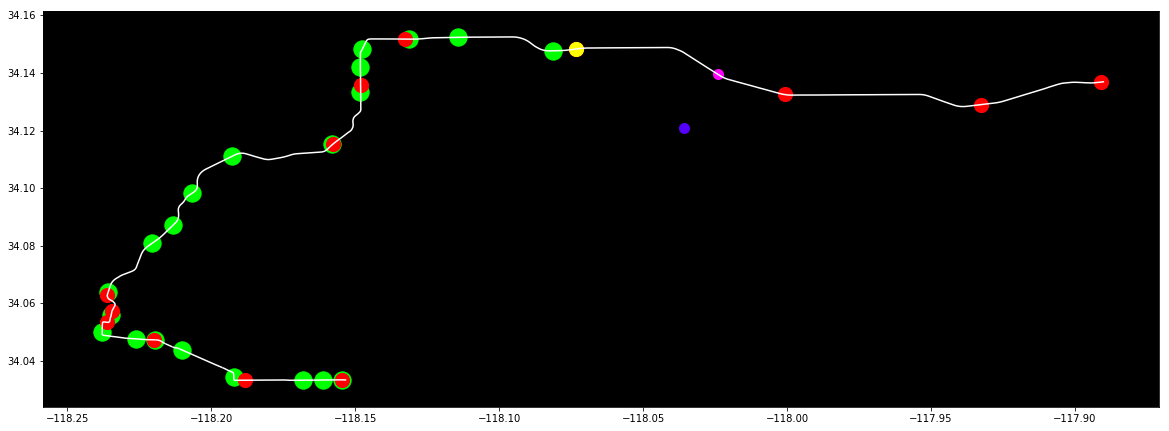

In [253]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, MultiPoint, MultiLineString, shape
from shapely.ops import nearest_points, linemerge

merged_line = gpd.read_file('shapefiles/gold_northbound/gold.shp')
goldline = merged_line.to_crs(epsg=4326)

combined = linemerge(goldline.geometry.tolist())

stations = gpd.read_file('shapefiles/Metro_Rail_Lines_Stops.shp')
stations = stations[stations['MetroLine'] == 'Gold Line']
tracked_positions = gdf

a_tracked_point = tracked_positions.iloc[4].geometry

stop_locs = stations.geometry.reset_index().drop(['index'], axis=1).geometry.tolist()

stop_locs = MultiPoint(stop_locs)

far_away = Point(-118.035701, 34.120845)

distance = combined.project(far_away)
new_point = combined.interpolate(distance)
print(new_point)

nearest = new_point
print(nearest)

a_tracked_point = gpd.GeoSeries(a_tracked_point)
nearest_p = gpd.GeoSeries(nearest)
far_away_series = gpd.GeoSeries(far_away)

base = goldline.plot(figsize=(20, 20), color='white')
base.set_facecolor("black")

stops = stations.plot(ax=base, color="#00ff00", markersize=300)
poz = tracked_positions.plot(ax=base, color="red", markersize=200)
a_tracked_point.plot(ax=base, color="#ffff00", markersize=200)
nearest_p.plot(ax=base, color="#ff00ff", markersize=100)
far_away_series.plot(ax=base, color="#5500ff", markersize=100)